#                               Predicting Co2 Emission In Vehicles

# Importing the libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots



# Importing the Dataset

In [2]:
dataset=pd.read_csv('CO2 Emissions_Canada.csv')
dataset

Make        Model   Vehicle Class  Engine Size(L)  Cylinders  \
0     ACURA          ILX         COMPACT             2.0          4   
1     ACURA          ILX         COMPACT             2.4          4   
2     ACURA   ILX HYBRID         COMPACT             1.5          4   
3     ACURA      MDX 4WD     SUV - SMALL             3.5          6   
4     ACURA      RDX AWD     SUV - SMALL             3.5          6   
...     ...          ...             ...             ...        ...   
7380  VOLVO  XC40 T5 AWD     SUV - SMALL             2.0          4   
7381  VOLVO  XC60 T5 AWD     SUV - SMALL             2.0          4   
7382  VOLVO  XC60 T6 AWD     SUV - SMALL             2.0          4   
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD             2.0          4   
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD             2.0          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
0             AS5         Z                               9.9   
1              M6         Z                              11.2   
2             AV7         Z                               6.0   
3             AS6         Z                              12.7   
4             AS6         Z                              12.1   
...           ...       ...                               ...   
7380          AS8         Z                              10.7   
7381          AS8         Z                              11.2   
7382          AS8         Z                              11.7   
7383          AS8         Z                              11.2   
7384          AS8         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                                 7.7                               9.6   
2                                 5.8                               5.9   
3                                 9.1                              11.1   
4                                 8.7                              10.6   
...                               ...                               ...   
7380                              7.7                               9.4   
7381                              8.3                               9.9   
7382                              8.6                              10.3   
7383                              8.3                               9.9   
7384                              8.7                              10.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                              33                  196  
1                              29                  221  
2                              48                  136  
3                              25                  255  
4                              27                  244  
...                           ...                  ...  
7380                           30                  219  
7381                           29                  232  
7382                           27                  240  
7383                           29                  232  
7384                           26                  248  

[7385 rows x 12 columns]

# Renaming the Columns

In [3]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
dataset.rename(renamed_col, axis='columns', inplace=True)

# Checking For Null Values

In [4]:
dataset.isnull().any()

Make                 False
Model                False
vehicle_class        False
engine_size          False
Cylinders            False
Transmission         False
fuel_type            False
fuel_cons_city       False
fuel_cons_hwy        False
fuel_cons_comb       False
mpgfuel_cons_comb    False
co2                  False
dtype: bool

In [5]:
dataset.isnull().sum()

Make                 0
Model                0
vehicle_class        0
engine_size          0
Cylinders            0
Transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

In [6]:
dataset.columns


Index(['Make', 'Model', 'vehicle_class', 'engine_size', 'Cylinders',
       'Transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

# Information of Dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               7385 non-null   object 
 1   Model              7385 non-null   object 
 2   vehicle_class      7385 non-null   object 
 3   engine_size        7385 non-null   float64
 4   Cylinders          7385 non-null   int64  
 5   Transmission       7385 non-null   object 
 6   fuel_type          7385 non-null   object 
 7   fuel_cons_city     7385 non-null   float64
 8   fuel_cons_hwy      7385 non-null   float64
 9   fuel_cons_comb     7385 non-null   float64
 10  mpgfuel_cons_comb  7385 non-null   int64  
 11  co2                7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.5+ KB


In [8]:
dataset.describe()

engine_size    Cylinders  fuel_cons_city  fuel_cons_hwy  \
count  7385.000000  7385.000000     7385.000000    7385.000000   
mean      3.160068     5.615030       12.556534       9.041706   
std       1.354170     1.828307        3.500274       2.224456   
min       0.900000     3.000000        4.200000       4.000000   
25%       2.000000     4.000000       10.100000       7.500000   
50%       3.000000     6.000000       12.100000       8.700000   
75%       3.700000     6.000000       14.600000      10.200000   
max       8.400000    16.000000       30.600000      20.600000   

       fuel_cons_comb  mpgfuel_cons_comb          co2  
count     7385.000000        7385.000000  7385.000000  
mean        10.975071          27.481652   250.584699  
std          2.892506           7.231879    58.512679  
min          4.100000          11.000000    96.000000  
25%          8.900000          22.000000   208.000000  
50%         10.600000          27.000000   246.000000  
75%         12.600000          32.000000   288.000000  
max         26.100000          69.000000   522.000000

# Data Visualization

In [9]:
dataset.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

# Make VS CO2 Emission

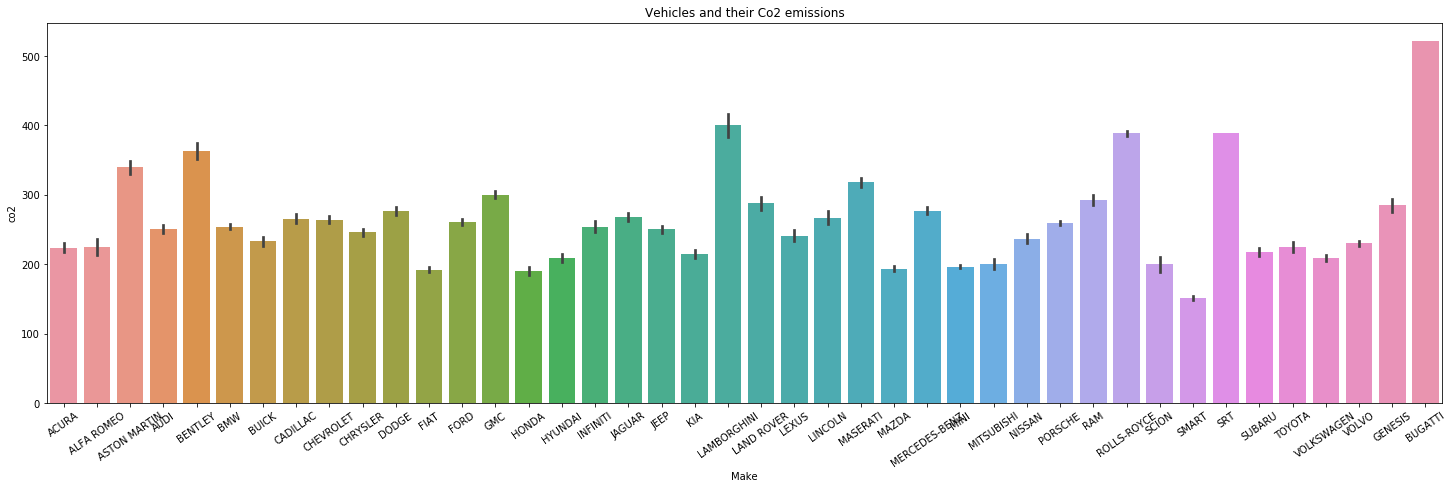

In [10]:
f, ax = plt.subplots(figsize=(25,7))

x = dataset.Make.value_counts().sort_values()

ax = sns.barplot(data=dataset,x='Make',y='co2')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

# Checking the Fuel Type

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


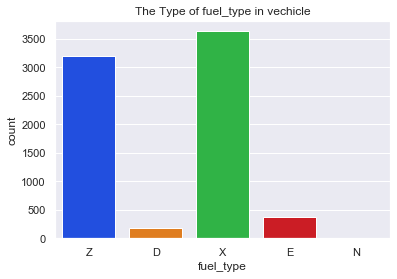

In [11]:
 
sns.set()
plt.title("The Type of fuel_type in vechicle")
sns.countplot(dataset.fuel_type, palette="bright")
plt.show()

# Fuel Type VS CO2 Emission

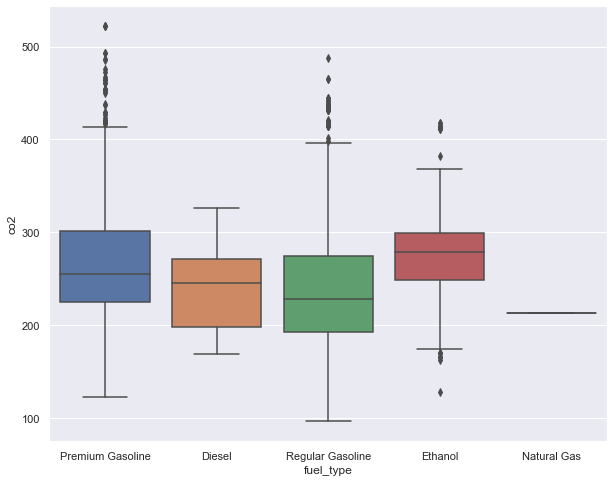

In [12]:
plt.figure(figsize = (10,8))
sns.boxplot(x = 'fuel_type' , y = 'co2', data = dataset)
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])
plt.show()

# Fuel Type VS Fuel Consumption Comb (mpg)

([<matplotlib.axis.XTick at 0x1eba5b5a7c8>,
 <a list of 5 Text xticklabel objects>)

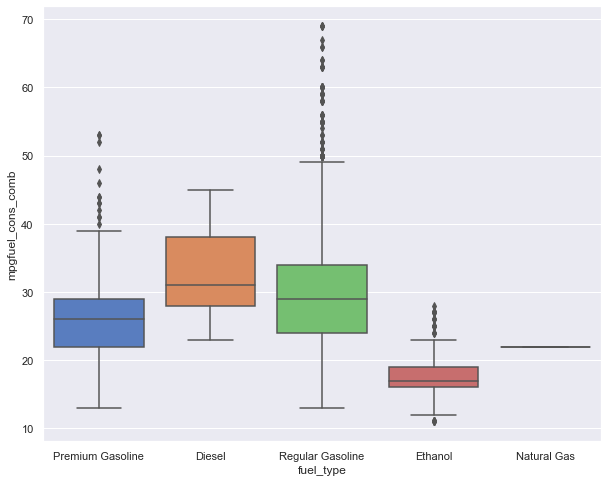

In [13]:
plt.figure(figsize = (10,8))
sns.boxplot(y = 'mpgfuel_cons_comb', x = 'fuel_type', data = dataset, palette = 'muted')
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])

# Distribution of Fuel Type

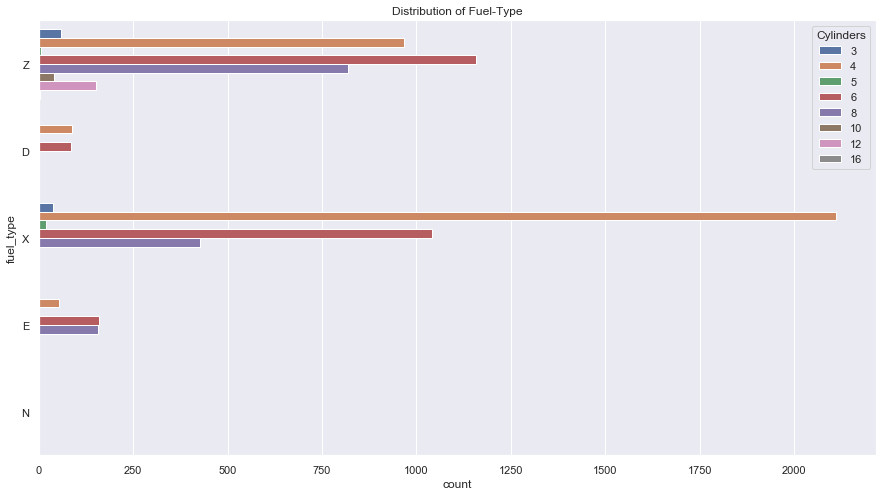

In [14]:
plt.figure(figsize = (15,8))
sns.countplot(y='fuel_type', data=dataset, hue='Cylinders')
plt.title('Distribution of Fuel-Type')
plt.show()

# Cylinders VS CO2 Emission

<Figure size 720x576 with 0 Axes>

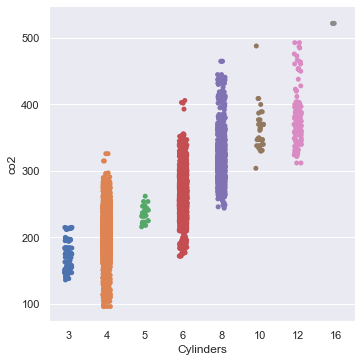

In [15]:
plt.figure(figsize = (10,8))
sns.catplot(x = 'Cylinders' , y = 'co2', data = dataset)
plt.show()

# Checking the Vehicle Class

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 <a list of 8 Text xticklabel objects>)

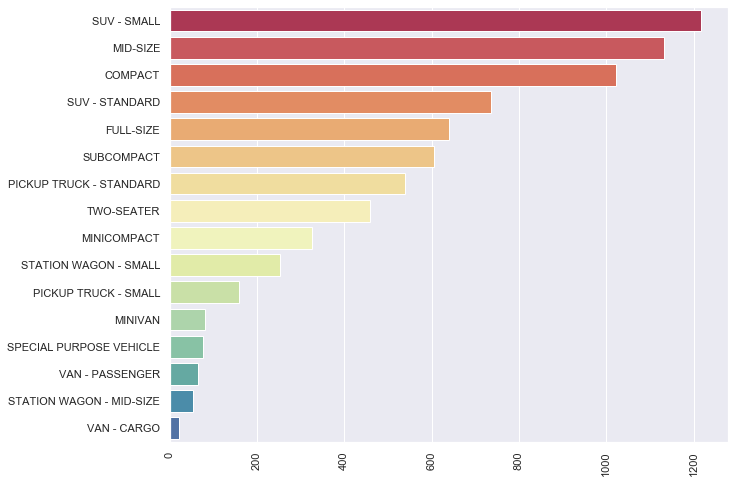

In [16]:
mkI = dataset['vehicle_class'].value_counts().index
mkV = dataset['vehicle_class'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkV,mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

# Vehicle Class VS CO2 Emission

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

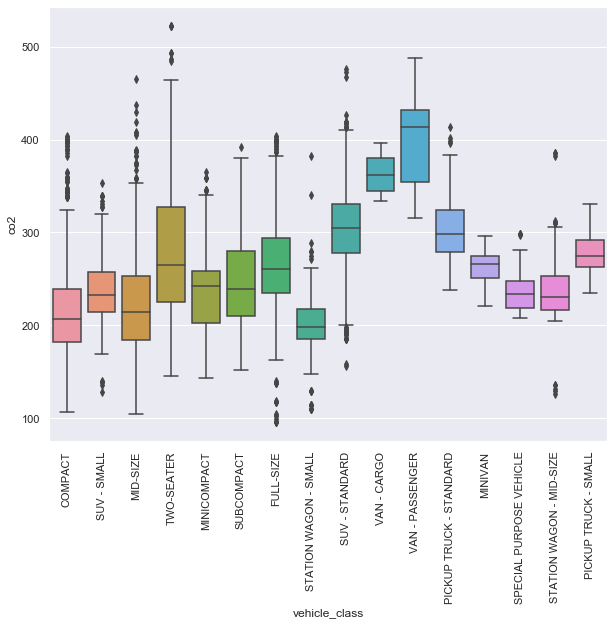

In [17]:
plt.figure(figsize = (10,8))
sns.boxplot(x="vehicle_class", y="co2", data=dataset)
plt.xticks(rotation = 'vertical')

In [18]:
city=dataset.fuel_cons_city
highway = dataset.fuel_cons_hwy
city_hwy_df = dataset[['fuel_cons_city', 'fuel_cons_hwy', 'fuel_type','co2']]
city_hwy_df.head()

fuel_cons_city  fuel_cons_hwy fuel_type  co2
0             9.9            6.7         Z  196
1            11.2            7.7         Z  221
2             6.0            5.8         Z  136
3            12.7            9.1         Z  255
4            12.1            8.7         Z  244

# Comparision of Fuel Consumption in city and Fuel Consumption in Highway

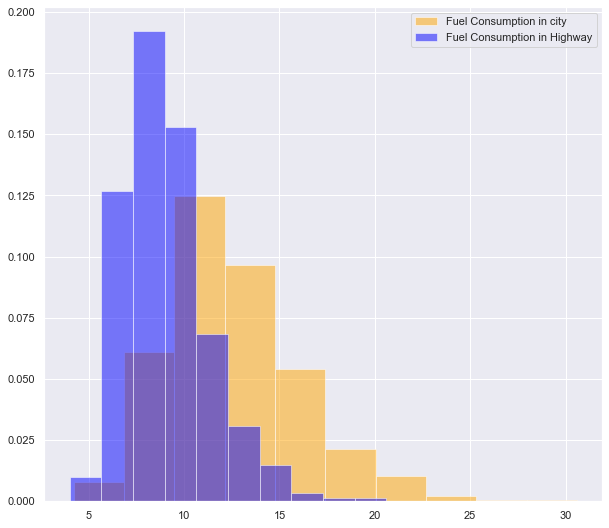

In [19]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(city, color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(highway, color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend()
plt.show()

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


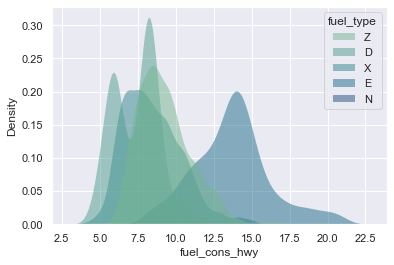

In [20]:
sns.kdeplot(
   data=city_hwy_df, x="fuel_cons_hwy", hue="fuel_type",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

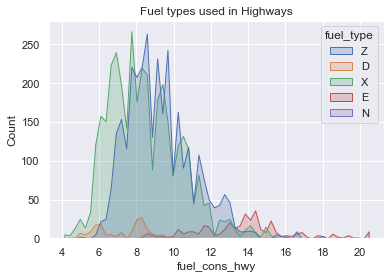

In [21]:
sns.histplot(city_hwy_df, x="fuel_cons_hwy", hue="fuel_type", element="poly")
plt.title('Fuel types used in Highways')
plt.show()

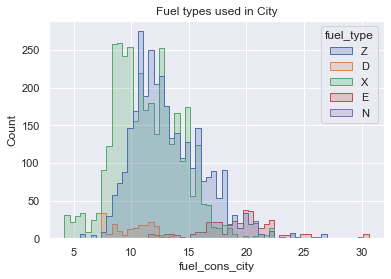

In [22]:
sns.histplot(city_hwy_df, x="fuel_cons_city", hue="fuel_type", element="step")
plt.title('Fuel types used in City')
plt.show()

# Transmission Distribution

In [23]:
transmission_distr =dataset['Transmission'].value_counts().reset_index()
fig = px.pie(transmission_distr, values='Transmission', names='index')
fig.update_layout(title="Transmission Distribution")
fig.show()

# Transmission VS CO2 Emission

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



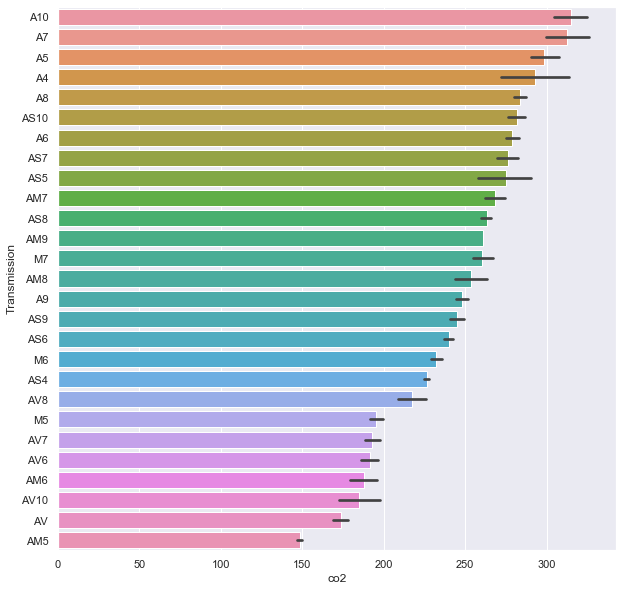

In [24]:
plt.figure(figsize = (10,10))
order = dataset.groupby(["Transmission"]).mean().sort_values("co2", ascending = False).index
sns.barplot(dataset["co2"],dataset["Transmission"],order = order)

# Correlation

In [25]:
dataset.corr()

engine_size  Cylinders  fuel_cons_city  fuel_cons_hwy  \
engine_size           1.000000   0.927653        0.831379       0.761526   
Cylinders             0.927653   1.000000        0.800702       0.715252   
fuel_cons_city        0.831379   0.800702        1.000000       0.948180   
fuel_cons_hwy         0.761526   0.715252        0.948180       1.000000   
fuel_cons_comb        0.817060   0.780534        0.993810       0.977299   
mpgfuel_cons_comb    -0.757854  -0.719321       -0.927059      -0.890638   
co2                   0.851145   0.832644        0.919592       0.883536   

                   fuel_cons_comb  mpgfuel_cons_comb       co2  
engine_size              0.817060          -0.757854  0.851145  
Cylinders                0.780534          -0.719321  0.832644  
fuel_cons_city           0.993810          -0.927059  0.919592  
fuel_cons_hwy            0.977299          -0.890638  0.883536  
fuel_cons_comb           1.000000          -0.925576  0.918052  
mpgfuel_cons_comb       -0.925576           1.000000 -0.907426  
co2                      0.918052          -0.907426  1.000000

# Correlation Matrix

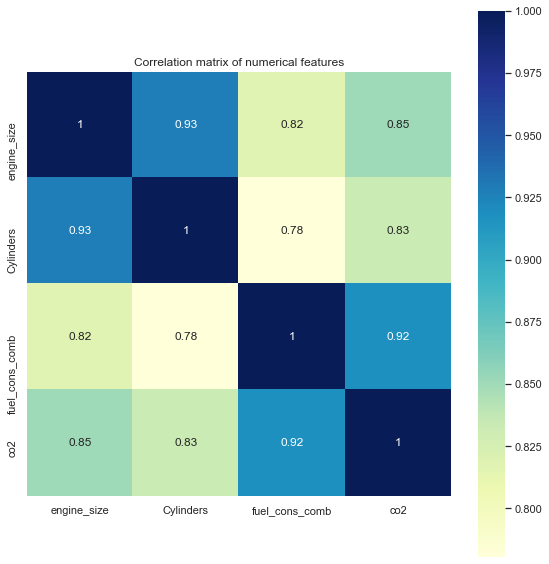

In [86]:

corr = dataset.corr() 
plt.subplots(figsize=(8,8));
sns.heatmap(corr, annot=True,cmap="YlGnBu",square=True) 
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

# Dropping Unnecessay Columns

In [27]:
dataset.drop(['Make','Model','vehicle_class','fuel_cons_city','fuel_cons_hwy','fuel_type','Transmission','mpgfuel_cons_comb'],inplace=True,axis=1)

In [28]:
dataset.head()

engine_size  Cylinders  fuel_cons_comb  co2
0          2.0          4             8.5  196
1          2.4          4             9.6  221
2          1.5          4             5.9  136
3          3.5          6            11.1  255
4          3.5          6            10.6  244

# Outliers Removal using Z Score

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



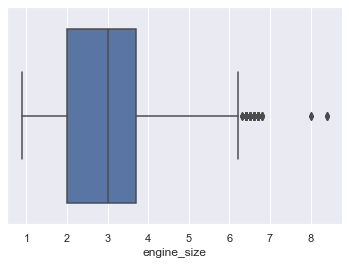

In [29]:
sns.boxplot(dataset['engine_size'])

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



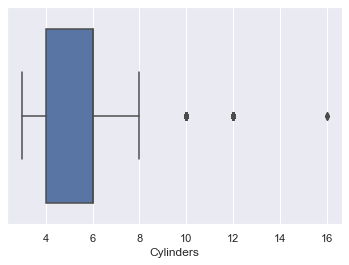

In [30]:
sns.boxplot(dataset['Cylinders'])

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



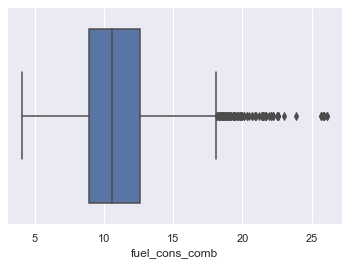

In [31]:
sns.boxplot(dataset['fuel_cons_comb'])

C:\Users\vikas\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



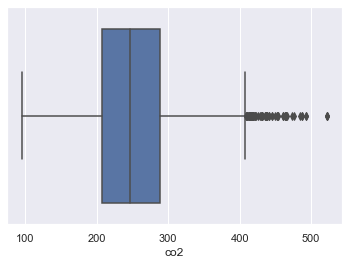

In [32]:
sns.boxplot(dataset['co2'])

In [33]:
from scipy import stats
z=np.abs(stats.zscore(dataset))
z

array([[0.85672099, 0.88340757, 0.85574185, 0.93293275],
       [0.5613172 , 0.88340757, 0.47542306, 0.50564599],
       [1.22597573, 0.88340757, 1.75467716, 1.95842095],
       ...,
       [0.85672099, 0.88340757, 0.23340202, 0.18090806],
       [0.85672099, 0.88340757, 0.37169976, 0.31763982],
       [0.85672099, 0.88340757, 0.09510428, 0.0441763 ]])

In [34]:
threshold=3
np.where(z>threshold)

(array([  13,   14,   19,   36,   70,   72,   73,   74,   75,  112,  180,
         182,  212,  214,  216,  218,  220,  222,  224,  225,  227,  228,
         344,  346,  348,  349,  349,  351,  362,  380,  382,  388,  390,
         436,  438,  440,  442,  444,  446,  448,  449,  451,  452,  474,
         476,  637,  646,  652,  658,  691,  927,  928,  929,  930,  931,
         932,  933,  945,  946, 1082, 1083, 1088, 1091, 1113, 1149, 1151,
        1154, 1208, 1323, 1324, 1325, 1327, 1328, 1329, 1431, 1509, 1528,
        1529, 1530, 1532, 1533, 1534, 1742, 1743, 1743, 1743, 1745, 1750,
        1752, 1757, 1872, 1875, 1876, 1879, 2058, 2059, 2060, 2061, 2062,
        2063, 2064, 2212, 2213, 2214, 2221, 2241, 2263, 2265, 2267, 2433,
        2434, 2434, 2544, 2636, 2662, 2663, 2663, 2872, 2873, 2873, 2971,
        2971, 2971, 2979, 2980, 2982, 3012, 3019, 3176, 3177, 3178, 3179,
        3180, 3181, 3182, 3327, 3328, 3329, 3330, 3331, 3331, 3368, 3370,
        3372, 3374, 3376, 3436, 3524, 

In [35]:
clean_df= pd.DataFrame(dataset)
clean_df

engine_size  Cylinders  fuel_cons_comb  co2
0             2.0          4             8.5  196
1             2.4          4             9.6  221
2             1.5          4             5.9  136
3             3.5          6            11.1  255
4             3.5          6            10.6  244
...           ...        ...             ...  ...
7380          2.0          4             9.4  219
7381          2.0          4             9.9  232
7382          2.0          4            10.3  240
7383          2.0          4             9.9  232
7384          2.0          4            10.7  248

[7385 rows x 4 columns]

In [36]:
df_no_outliers=clean_df[(z<=3).all(axis=1)]
df_no_outliers

engine_size  Cylinders  fuel_cons_comb  co2
0             2.0          4             8.5  196
1             2.4          4             9.6  221
2             1.5          4             5.9  136
3             3.5          6            11.1  255
4             3.5          6            10.6  244
...           ...        ...             ...  ...
7380          2.0          4             9.4  219
7381          2.0          4             9.9  232
7382          2.0          4            10.3  240
7383          2.0          4             9.9  232
7384          2.0          4            10.7  248

[7157 rows x 4 columns]

# Creating the Dependent and Independent variable

In [37]:
x=df_no_outliers.drop(['co2'],axis=1)
x

engine_size  Cylinders  fuel_cons_comb
0             2.0          4             8.5
1             2.4          4             9.6
2             1.5          4             5.9
3             3.5          6            11.1
4             3.5          6            10.6
...           ...        ...             ...
7380          2.0          4             9.4
7381          2.0          4             9.9
7382          2.0          4            10.3
7383          2.0          4             9.9
7384          2.0          4            10.7

[7157 rows x 3 columns]

In [38]:
y=df_no_outliers["co2"]
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: co2, Length: 7157, dtype: int64

# Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
import joblib
sc=StandardScaler()
x=sc.fit_transform(x)
x
joblib.dump(sc,'standard.save')


['standard.save']

# Splitting the Dataset into train and test

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Model Building Using Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
mr=LinearRegression()

# Fitting the model to training data

In [43]:
model=mr.fit(x_train,y_train)

# Making Predictions

In [44]:
y_pred=mr.predict(x_test)
y_pred

array([373.41938679, 172.7802348 , 272.18033419, ..., 241.51011101,
       321.57600975, 233.59796301])

In [45]:
y_test

553     290
2156    178
4347    287
5401    274
2463    188
       ... 
1537    292
3293    231
5985    238
3589    325
2647    252
Name: co2, Length: 1432, dtype: int64

# Checking the Score of Model

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8851245497776775

# Saving the Model

In [47]:
import joblib
joblib.dump(mr,'newmodel.save')

['newmodel.save']

# Checking the Mean Squared Error

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
mse=mean_squared_error(y_test,y_pred)

In [50]:
from math import sqrt
rmse=sqrt(mse)
rmse

18.476390690561917

In [51]:
pred=model.predict(x_test)
frames = [pred,y_test]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Lin=result_pred.rename(columns={0:'Pred_Linear',1:'Real_Value'})
result_pred_Lin["Pred_Linear"]=result_pred_Lin["Pred_Linear"].map(lambda x:round(x,2))
result_pred_Lin["Diff"]=result_pred_Lin["Pred_Linear"]-result_pred_Lin["Real_Value"]
result_pred_Lin["Diff"]=result_pred_Lin["Diff"]
print("Mean Diff: ",abs(result_pred_Lin["Diff"]).mean())
result_pred_Lin.head(20)

Mean Diff:  12.160418994413421


Pred_Linear  Real_Value   Diff
0        373.42       290.0  83.42
1        172.78       178.0  -5.22
2        272.18       287.0 -14.82
3        264.75       274.0  -9.25
4        190.82       188.0   2.82
5        207.58       211.0  -3.42
6        372.47       416.0 -43.53
7        340.07       364.0 -23.93
8        188.98       183.0   5.98
9        254.09       251.0   3.09
10       188.98       186.0   2.98
11       209.94       208.0   1.94
12       219.68       228.0  -8.32
13       236.38       254.0 -17.62
14       307.14       307.0   0.14
15       176.91       165.0  11.91
16       202.90       202.0   0.90
17       204.37       201.0   3.37
18       288.47       286.0   2.47
19       274.49       291.0 -16.51

# Model Building Using Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [53]:
dt_model=DecisionTreeRegressor(criterion='mse',random_state=0)

In [54]:
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [55]:
y_pred=dt_model.predict(x_test)
y_pred

array([300.        , 176.25      , 286.25      , ..., 246.76190476,
       323.55555556, 250.5625    ])

In [56]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.420156024586886

In [57]:
dt_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15]}


In [58]:
dt_model = DecisionTreeRegressor(random_state = 42)

# Using GridSearch for hyperparameter tuning

In [59]:
dt_cv_model = GridSearchCV(dt_model, 
                           dt_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [60]:
dt_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:    5.4s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
  

In [61]:
dt_cv_model.best_params_

{'max_depth': 9, 'max_features': 3}

In [62]:
dt_tuned = DecisionTreeRegressor(max_depth  = 9, 
                                 max_features = 3)

In [63]:
dt_tuned.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.420156024586886

# Checking the Score of The Model

In [65]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9814724059217347

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.600777 to fit



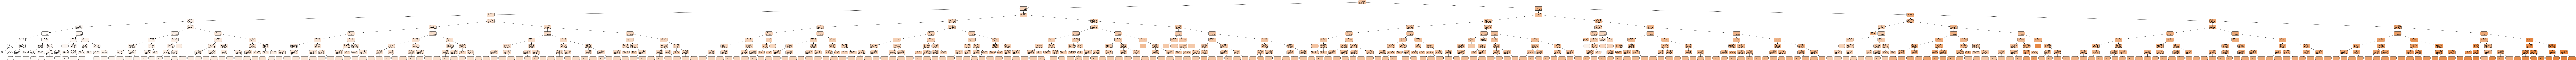

In [66]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dt_tuned,out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [67]:
pred=dt_tuned.predict(x_test)
frames = [pred,y_test]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Dt=result_pred.rename(columns={0:'Pred_DT',1:'Real'})
result_pred_Dt["Pred_DT"]=result_pred_Dt["Pred_DT"].map(lambda x:round(x,2))
result_pred_Dt["Diff"]=result_pred_Dt["Pred_DT"]-result_pred_Dt["Real"]
result_pred_Dt["Diff"]=result_pred_Dt["Diff"]
print("Mean Diff: ",abs(result_pred_Dt["Diff"]).mean())
result_pred_Dt.head(20)

Mean Diff:  3.6608868715083807


Pred_DT   Real   Diff
0    308.02  290.0  18.02
1    176.00  178.0  -2.00
2    285.07  287.0  -1.93
3    272.93  274.0  -1.07
4    186.26  188.0  -1.74
5    209.57  211.0  -1.43
6    350.09  416.0 -65.91
7    361.62  364.0  -2.38
8    181.14  183.0  -1.86
9    254.26  251.0   3.26
10   181.14  186.0  -4.86
11   209.57  208.0   1.57
12   225.60  228.0  -2.40
13   253.15  254.0  -0.85
14   306.44  307.0  -0.56
15   164.89  165.0  -0.11
16   205.00  202.0   3.00
17   199.79  201.0  -1.21
18   285.07  286.0  -0.93
19   290.50  291.0  -0.50

# Model Building Using Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_model=RandomForestRegressor()

In [70]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [71]:
y_pred=rf_model.predict(x_test)

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

7.910303983875094

In [73]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 750]}


In [74]:
rf_model = RandomForestRegressor(random_state = 42)

# Using GridSearch for hyperparameter tuning

In [75]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1,
                          verbose = 2)

In [76]:
rf_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  2.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [77]:
rf_cv_model.best_params_

{'max_depth': 9, 'max_features': 3, 'n_estimators': 500}

In [78]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 3, 
                                 n_estimators =500)

In [79]:
rf_tuned.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

7.910303983875094

# Checking the Model Score

In [81]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9789438338438495

In [82]:
pred=rf_tuned.predict(x_test)
frames = [pred,y_test]
result_pred = pd.DataFrame(data=frames)
result_pred=result_pred.T

result_pred_Rf=result_pred.rename(columns={0:'Pred_RF',1:'Real'})
result_pred_Rf["Pred_RF"]=result_pred_Rf["Pred_RF"].map(lambda x:round(x,2))
result_pred_Rf["Diff"]=result_pred_Rf["Pred_RF"]-result_pred_Rf["Real"]
result_pred_Rf["Diff"]=result_pred_Rf["Diff"]
print("Mean Diff: ",abs(result_pred_Rf["Diff"]).mean())
result_pred_Rf.head(20)

Mean Diff:  3.640062849162012


Pred_RF   Real   Diff
0    304.31  290.0  14.31
1    175.04  178.0  -2.96
2    285.04  287.0  -1.96
3    272.76  274.0  -1.24
4    185.78  188.0  -2.22
5    209.73  211.0  -1.27
6    383.85  416.0 -32.15
7    360.13  364.0  -3.87
8    181.23  183.0  -1.77
9    254.20  251.0   3.20
10   181.23  186.0  -4.77
11   209.24  208.0   1.24
12   225.69  228.0  -2.31
13   253.30  254.0  -0.70
14   304.98  307.0  -2.02
15   164.77  165.0  -0.23
16   204.86  202.0   2.86
17   199.77  201.0  -1.23
18   284.89  286.0  -1.11
19   290.33  291.0  -0.67

# Model Comparison

In [83]:
result = pd.concat([result_pred_Lin,result_pred_Dt, result_pred_Rf
                    ],
                   axis=1,
                   sort=False)
final_result=result["Real_Value"]
final_result=pd.DataFrame(final_result)
result.drop(['Diff',"Real"],inplace=True,axis=1)
final_result=pd.concat([final_result,result],axis=1)

In [84]:
colors=['lightblue','lightpink','lightgreen','yellow']
fig = go.Figure(data=[go.Table(header=dict(values=['Real Value', 'Pred Linear','Pred DT','Pred RF'],

line_color='white', fill_color='LightSlateGray',
align='center',font=dict(color='white', size=12)
                           ),
                               
 cells=dict( values=[final_result['Real_Value'],
     final_result['Pred_Linear'],
      final_result['Pred_DT'],
      final_result['Pred_RF']
        ],
      line_color=colors, fill_color=colors,
     align='center', font=dict(color='#660033', size=11))
                  )])
                      
fig.show()